In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\TopMentor\Random Forest\Fraud_check.csv')

In [5]:
# 3. Preview the data
print(df.head())
print(df.info())
print(df.describe())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    ob

In [6]:
df['Risk'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\2319509051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk', data=df, palette='Set2')


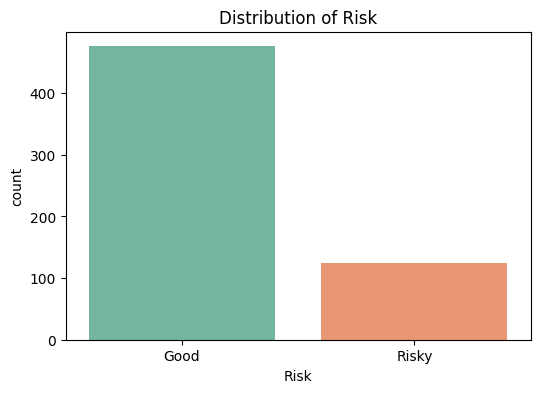

In [7]:
# Count plot for target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Risk', data=df, palette='Set2')
plt.title("Distribution of Risk")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\3365583078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


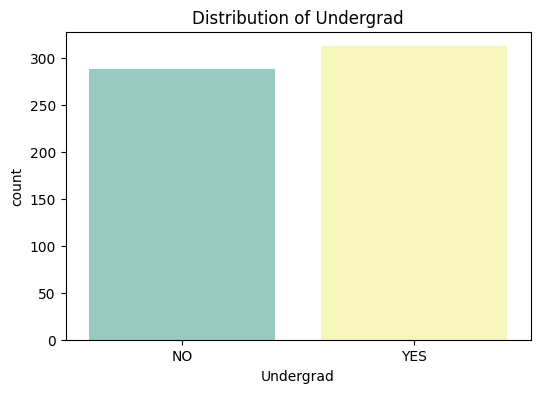

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\3365583078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


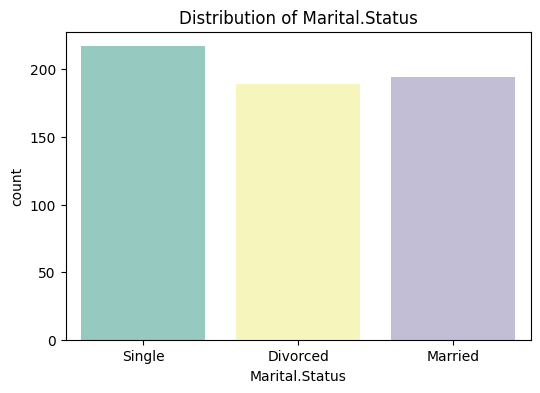

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\3365583078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


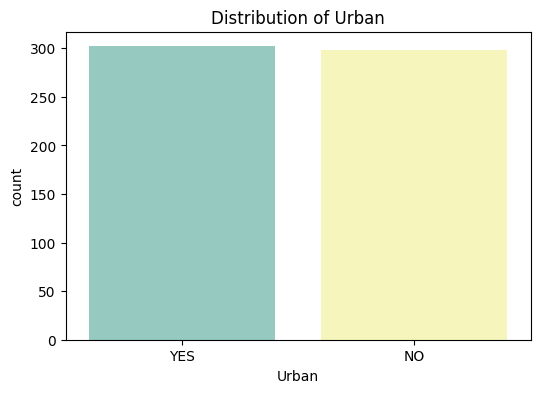

In [8]:
cat_cols = ['Undergrad', 'Marital.Status', 'Urban']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f"Distribution of {col}")
    plt.show()

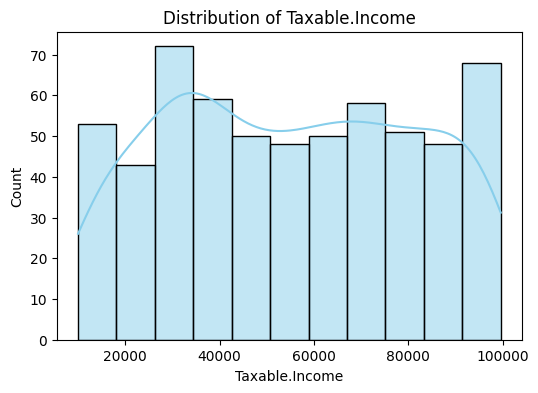

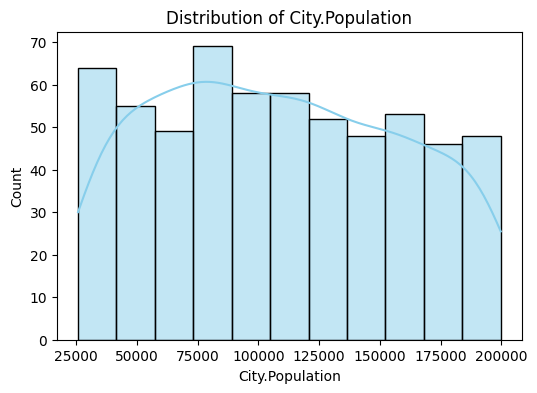

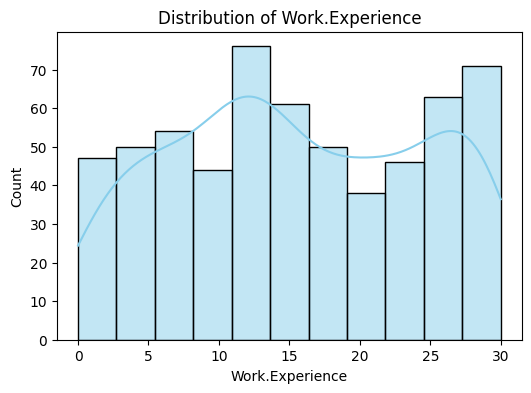

In [9]:
num_cols = ['Taxable.Income', 'City.Population', 'Work.Experience']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\1540816380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y=col, data=df, palette='coolwarm')


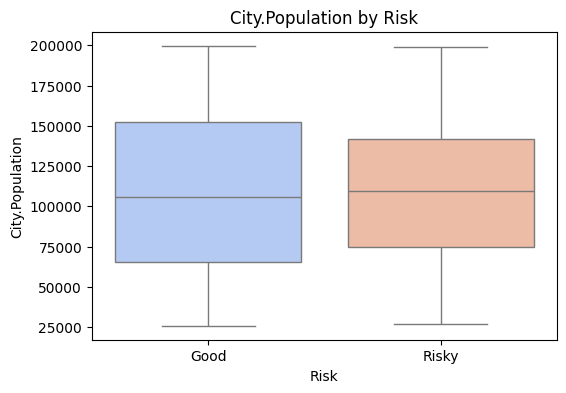

C:\Users\Admin\AppData\Local\Temp\ipykernel_792\1540816380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y=col, data=df, palette='coolwarm')


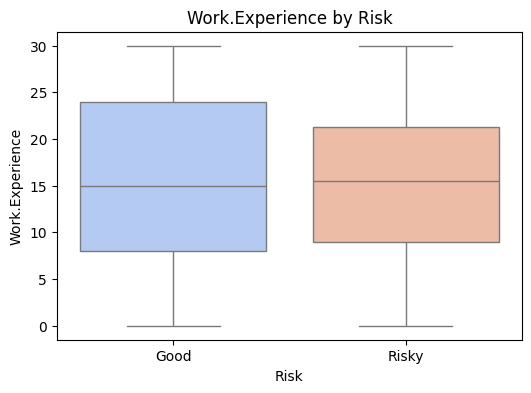

In [10]:
# Boxplots of numerical features vs Risk
for col in ['City.Population', 'Work.Experience']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Risk', y=col, data=df, palette='coolwarm')
    plt.title(f"{col} by Risk")
    plt.show()

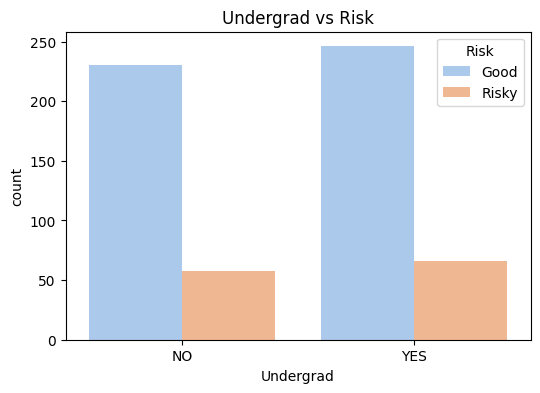

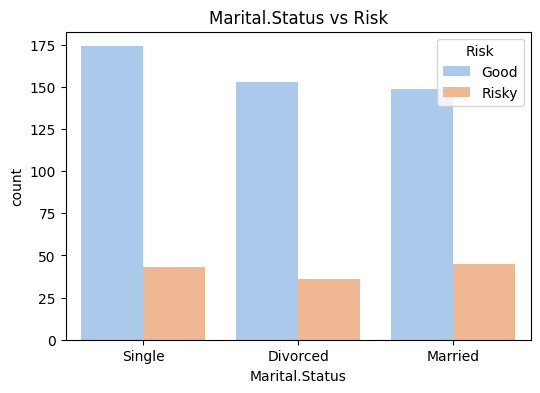

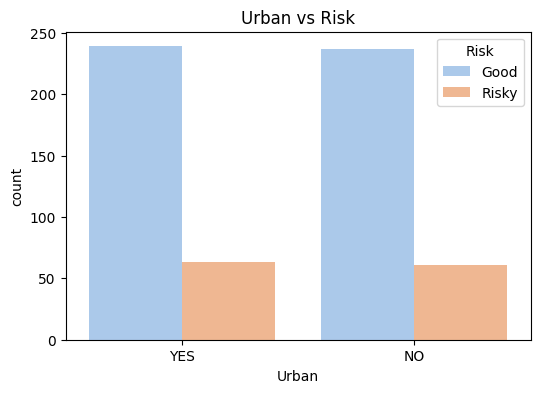

In [11]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Risk', data=df, palette='pastel')
    plt.title(f"{col} vs Risk")
    plt.legend(title='Risk')
    plt.show()

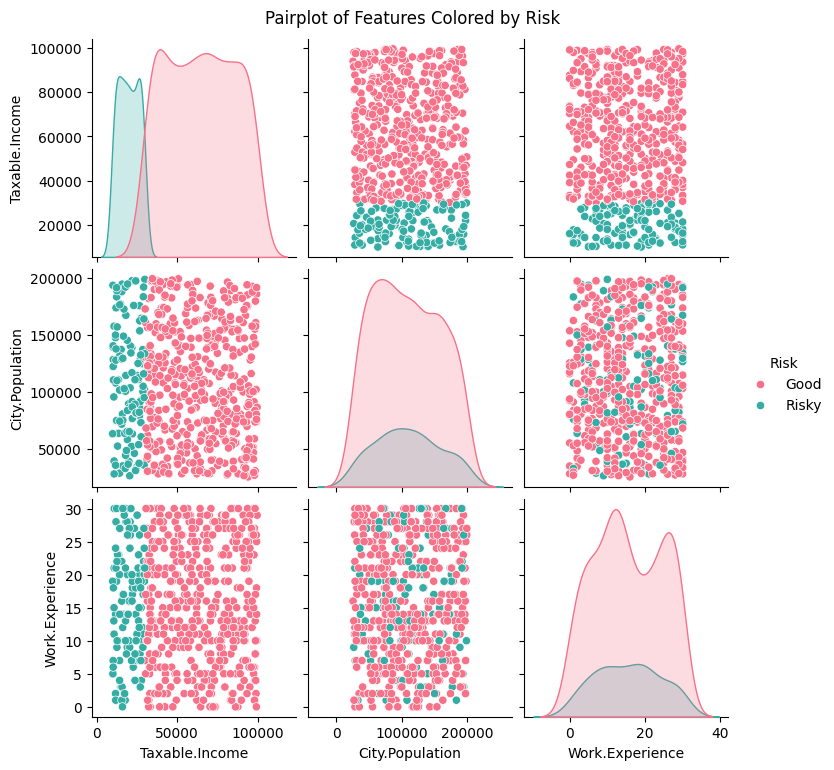

In [12]:
sns.pairplot(df[['Taxable.Income', 'City.Population', 'Work.Experience', 'Risk']], hue='Risk', palette='husl')
plt.suptitle("Pairplot of Features Colored by Risk", y=1.02)
plt.show()

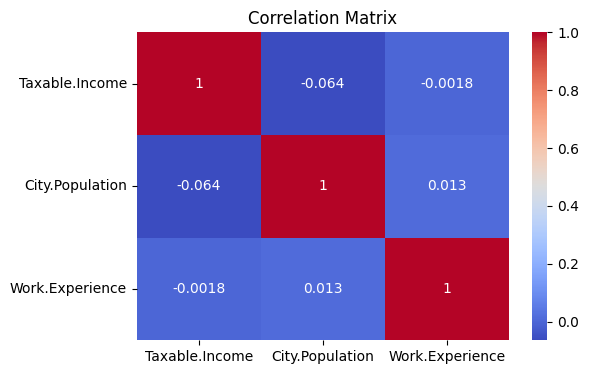

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
print("""
 Key Insights from EDA:

- The dataset is imbalanced with more 'Good' labels than 'Risky'.
- Individuals with lower taxable income (<= 30000) are labeled 'Risky'.
- No strong linear correlation between numeric features, but some clusters observed in the pairplot.
- 'Undergrad', 'Urban', and 'Marital.Status' distributions do show visible shifts across risk groups.
- 'Risky' individuals may be slightly skewed toward certain education or urban categories.
""")


 Key Insights from EDA:

- The dataset is imbalanced with more 'Good' labels than 'Risky'.
- Individuals with lower taxable income (<= 30000) are labeled 'Risky'.
- No strong linear correlation between numeric features, but some clusters observed in the pairplot.
- 'Undergrad', 'Urban', and 'Marital.Status' distributions do show visible shifts across risk groups.
- 'Risky' individuals may be slightly skewed toward certain education or urban categories.

